# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

Edición 2022

In [1]:
!pip install matplotlib==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:


import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("averaged_perceptron_tagger")
nltk.download("universal_tagset")

from google.colab import drive
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tag import pos_tag, map_tag

sns.set_context('talk')

np.set_printoptions(suppress=True)  # no usar notacion "e"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


# Sincronizamos Google Colaboratory con Google Drive

In [3]:
# Declaramos la ruta principal
google_drive = "/content/gdrive"
root_path = os.path.join(google_drive, "My Drive", "Colab Notebooks", "mentodatos")

drive.mount(google_drive, force_remount = True)

Mounted at /content/gdrive


In [4]:
# load dataset
df = pd.read_csv(os.path.join(root_path, "datasets", "news_dataset.csv"))

In [5]:
# dataset dimension
df.shape

(221513, 9)

In [6]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221513 entries, 0 to 221512
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            221513 non-null  int64 
 1   ticker        221513 non-null  object
 2   title         221513 non-null  object
 3   category      221513 non-null  object
 4   content       221505 non-null  object
 5   release_date  221513 non-null  object
 6   provider      221513 non-null  object
 7   url           221513 non-null  object
 8   article_id    221513 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 15.2+ MB


In [7]:
df.head(5)

,id,ticker,title,category,content,release_date,provider,url,article_id
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096


In [8]:
# statistical measures of the dataset
df.describe()

,id,article_id
count,221513.000000,2.215130e+05
mean,332271.337872,9.510278e+07
std,63945.826913,9.956825e+07
min,221515.000000,6.690000e+02
25%,276893.000000,4.657470e+05
50%,332271.000000,2.038949e+06
75%,387650.000000,2.003073e+08
max,443028.000000,2.005073e+08


In [9]:
# view column names
df.columns

Index(['id', 'ticker', 'title', 'category', 'content', 'release_date',
       'provider', 'url', 'article_id'],
      dtype='object')

In [10]:
# check for missing values
df.isnull().sum()

id              0
ticker          0
title           0
category        0
content         8
release_date    0
provider        0
url             0
article_id      0
dtype: int64

In [11]:
provider_count = df["provider"].value_counts()\
    .reset_index()\
    .rename(columns={'index': 'provider', 'provider': 'frequency'})


for i, row in enumerate(provider_count.itertuples(), 1):
    print(row)

Pandas(Index=0, provider='Zacks Investment Research', frequency=88072)
Pandas(Index=1, provider='Reuters', frequency=55100)
Pandas(Index=2, provider='Investing.com', frequency=18466)
Pandas(Index=3, provider='Seeking Alpha', frequency=12987)
Pandas(Index=4, provider='Bloomberg', frequency=3422)
Pandas(Index=5, provider='The Motley Fool', frequency=1251)
Pandas(Index=6, provider='Nicholas Santiago', frequency=1065)
Pandas(Index=7, provider='Gregory W. Harmon', frequency=972)
Pandas(Index=8, provider='Estimize', frequency=962)
Pandas(Index=9, provider='Ryan Mallory', frequency=905)
Pandas(Index=10, provider='International Business Times', frequency=896)
Pandas(Index=11, provider='iFOREX', frequency=765)
Pandas(Index=12, provider='Dr. Duru', frequency=735)
Pandas(Index=13, provider='CNBC', frequency=665)
Pandas(Index=14, provider='Tim Knight', frequency=659)
Pandas(Index=15, provider='Benzinga ', frequency=650)
Pandas(Index=16, provider='Cointelegraph', frequency=643)
Pandas(Index=17, pro

In [12]:
# filter the dataset, only analyze those that have published more than 1000 times
provider_count_filter = provider_count[provider_count["frequency"] >= 1000]

In [13]:
provider_count_filter

,provider,frequency
0,Zacks Investment Research,88072
1,Reuters,55100
2,Investing.com,18466
3,Seeking Alpha,12987
4,Bloomberg,3422
5,The Motley Fool,1251
6,Nicholas Santiago,1065


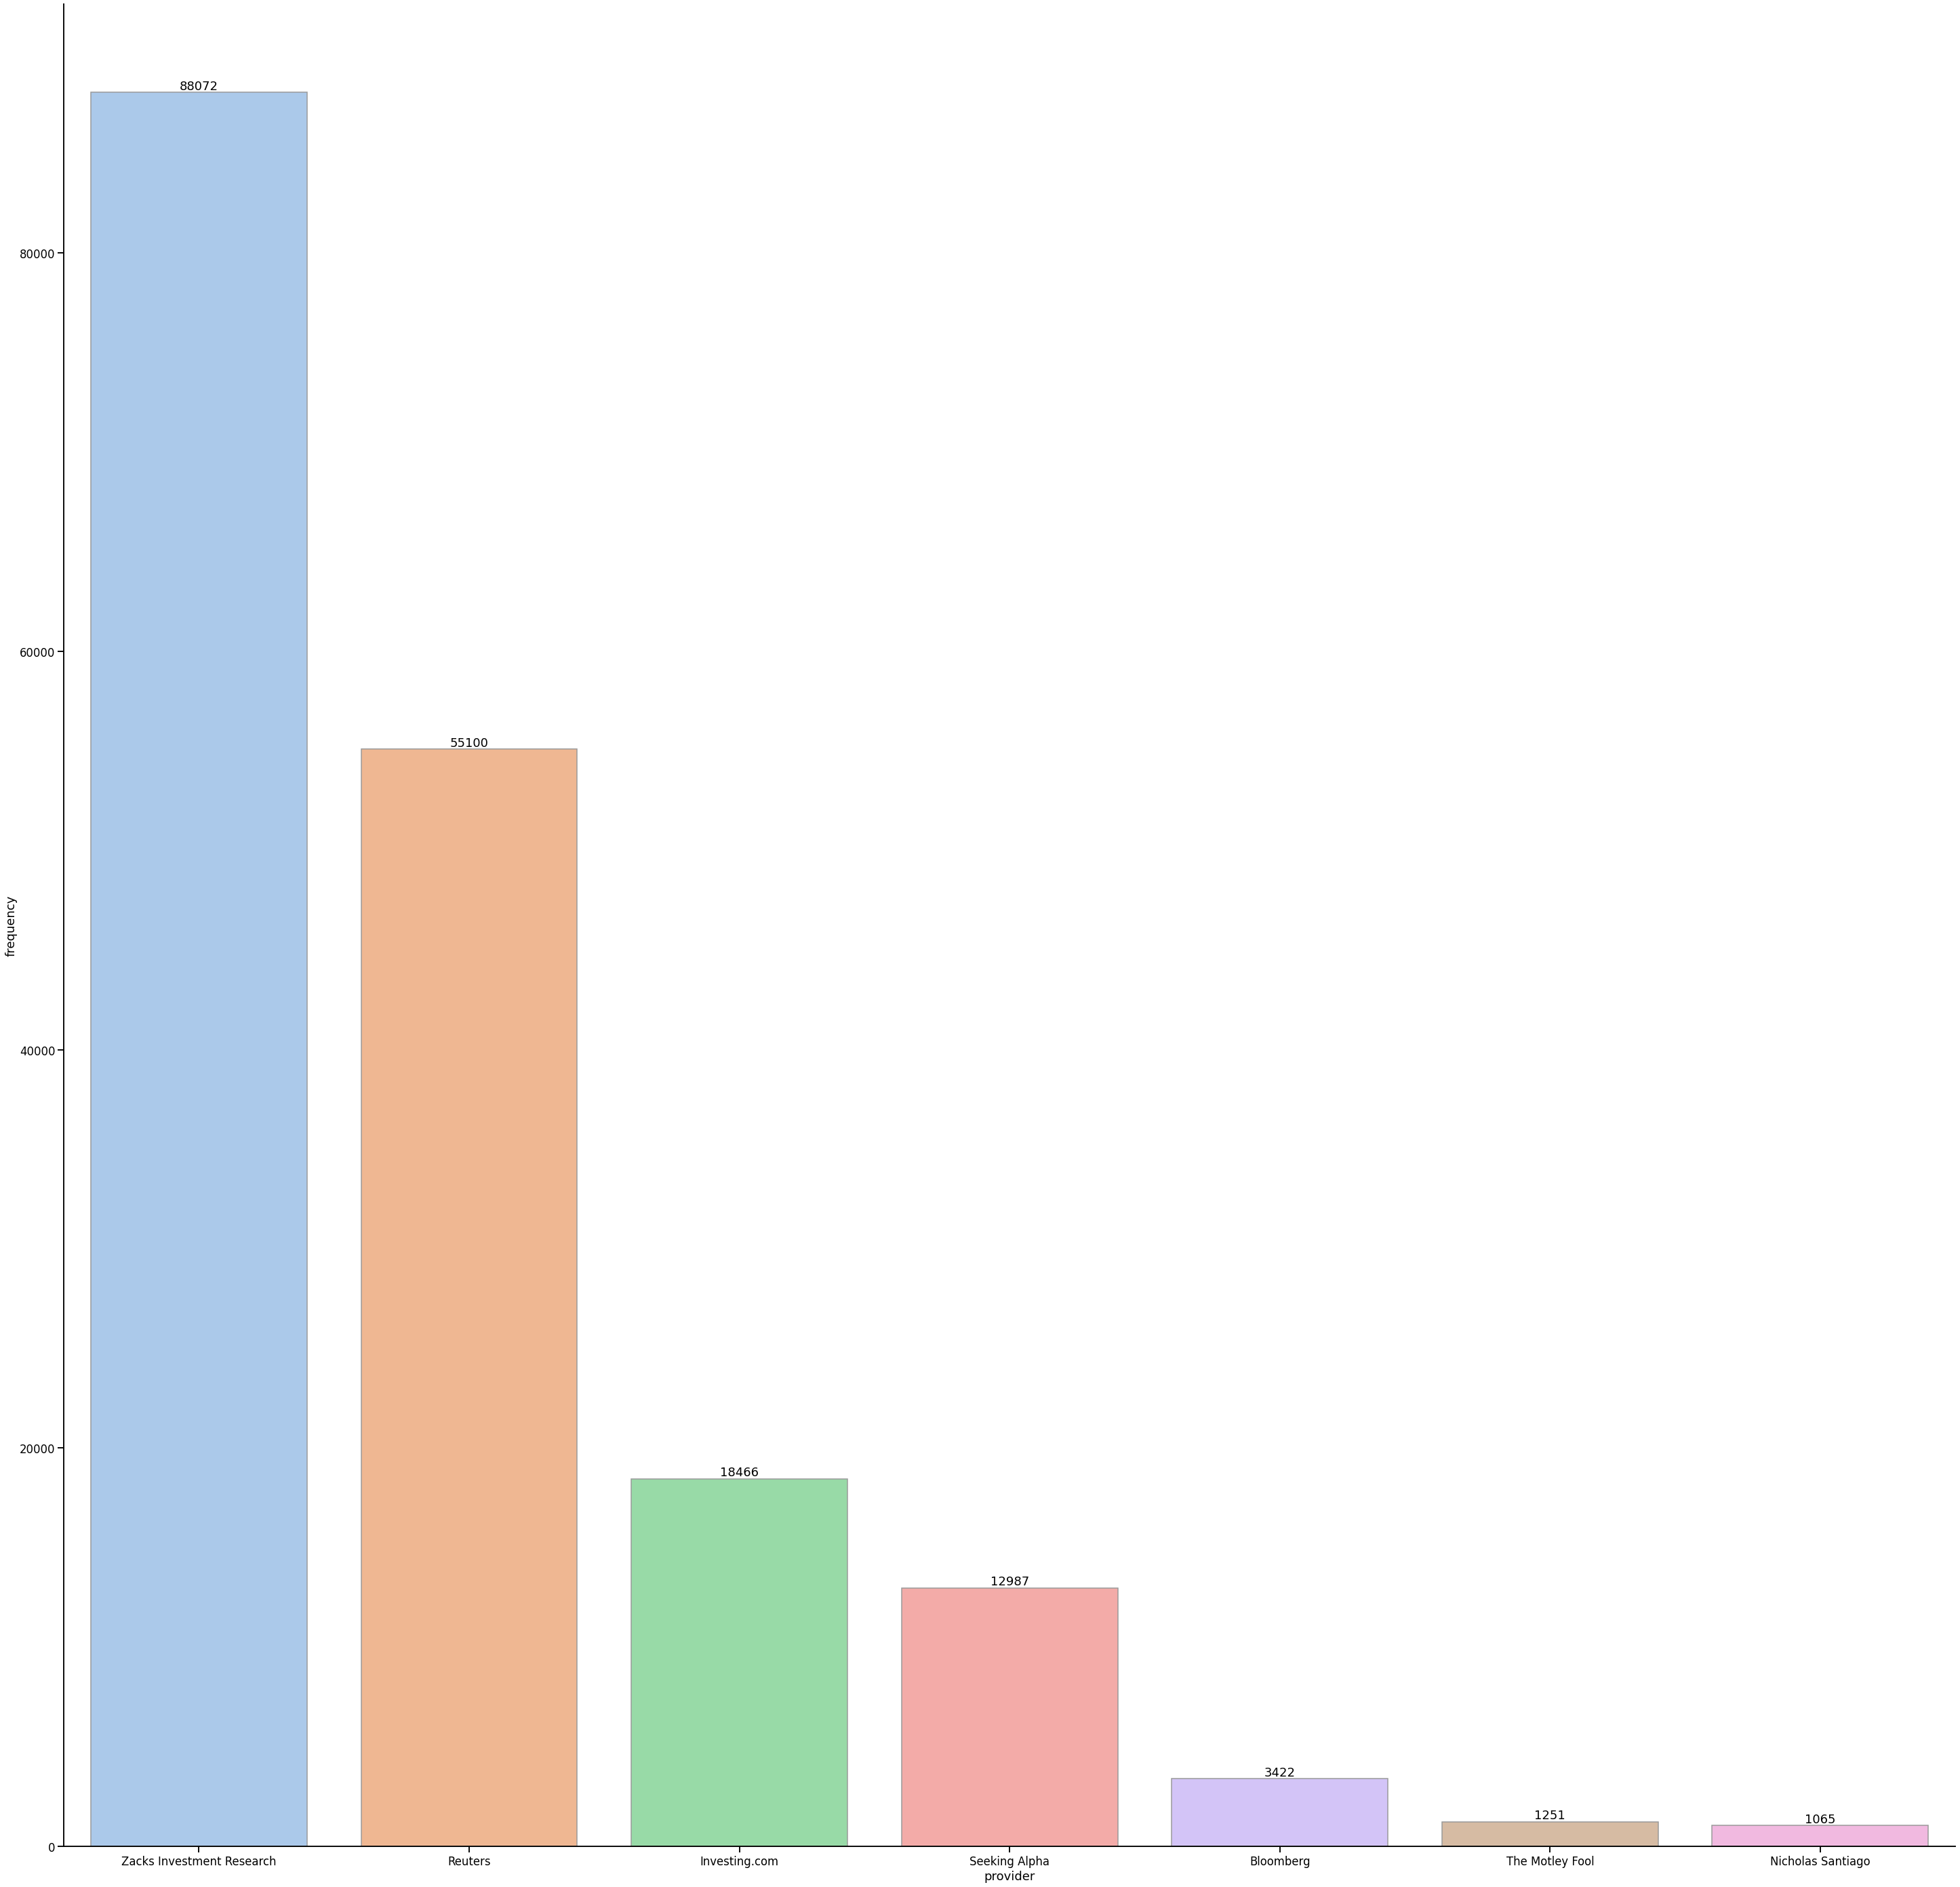

In [14]:
plt.figure(figsize=(50,50))


plt.xlabel('provider')
plt.ylabel('frequency')

ax = sns.barplot(x="provider", y="frequency" , palette="pastel", edgecolor=".6", data=provider_count_filter)
ax.bar_label(ax.containers[0])


sns.despine()

# Cantidad de noticias por año

In [15]:
# Copy and create a new dataset
new_df = df.copy()

In [16]:
# Creo una nueva columna en la que solo pongo el anio de la noticia, para ello
# convierto la columna "release_date" en tipo datetime para acceder a la propiedad year 
new_df['release_date_year'] = pd.to_datetime(new_df['release_date']).dt.year

In [17]:
new_df

,id,ticker,title,category,content,release_date,provider,url,article_id,release_date_year
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327,2020
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196,2020
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249,2020
3,221518,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039,2020
4,221519,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096,2020
...,...,...,...,...,...,...,...,...,...,...
221508,443024,T,Crude And Steel Still In Sync,opinion,We have been reporting on the trade off betwee...,2012-10-04,Ivan Kitov,https://www.investing.com/analysis/crude-and-s...,138733,2012
221509,443025,T,Forget AT T This Is The Telecom Stock You Sho...,opinion,It s the largest cell phone provider in the wo...,2012-05-30,StreetAuthority,https://www.investing.com/analysis/forget-at-t...,124829,2012
221510,443026,T,Wall Street Exposed Part 3 How Dividends C...,opinion,Before we dicuss how the mechanism of dividend...,2012-07-16,Portfolio Cafe,https://www.investing.com/analysis/wall-street...,129651,2012
221511,443027,T,Weighing The Week Ahead It s All About Jobs,opinion,From start to finish the coming week will hav...,2012-09-02,Jeff Miller,https://www.investing.com/analysis/weighing-th...,134926,2012


In [18]:
news_per_year_count = new_df["release_date_year"].value_counts()\
    .reset_index()\
    .rename(columns={'index': 'year', 'release_date_year': 'news_per_year'})


for i, row in enumerate(news_per_year_count.itertuples(), 0):
    print(row)

Pandas(Index=0, year=2019, news_per_year=58003)
Pandas(Index=1, year=2018, news_per_year=42606)
Pandas(Index=2, year=2017, news_per_year=41634)
Pandas(Index=3, year=2016, news_per_year=28551)
Pandas(Index=4, year=2015, news_per_year=12661)
Pandas(Index=5, year=2020, news_per_year=9347)
Pandas(Index=6, year=2013, news_per_year=8313)
Pandas(Index=7, year=2012, news_per_year=7009)
Pandas(Index=8, year=2014, news_per_year=5958)
Pandas(Index=9, year=2009, news_per_year=4514)
Pandas(Index=10, year=2011, news_per_year=2220)
Pandas(Index=11, year=2008, news_per_year=479)
Pandas(Index=12, year=2010, news_per_year=218)


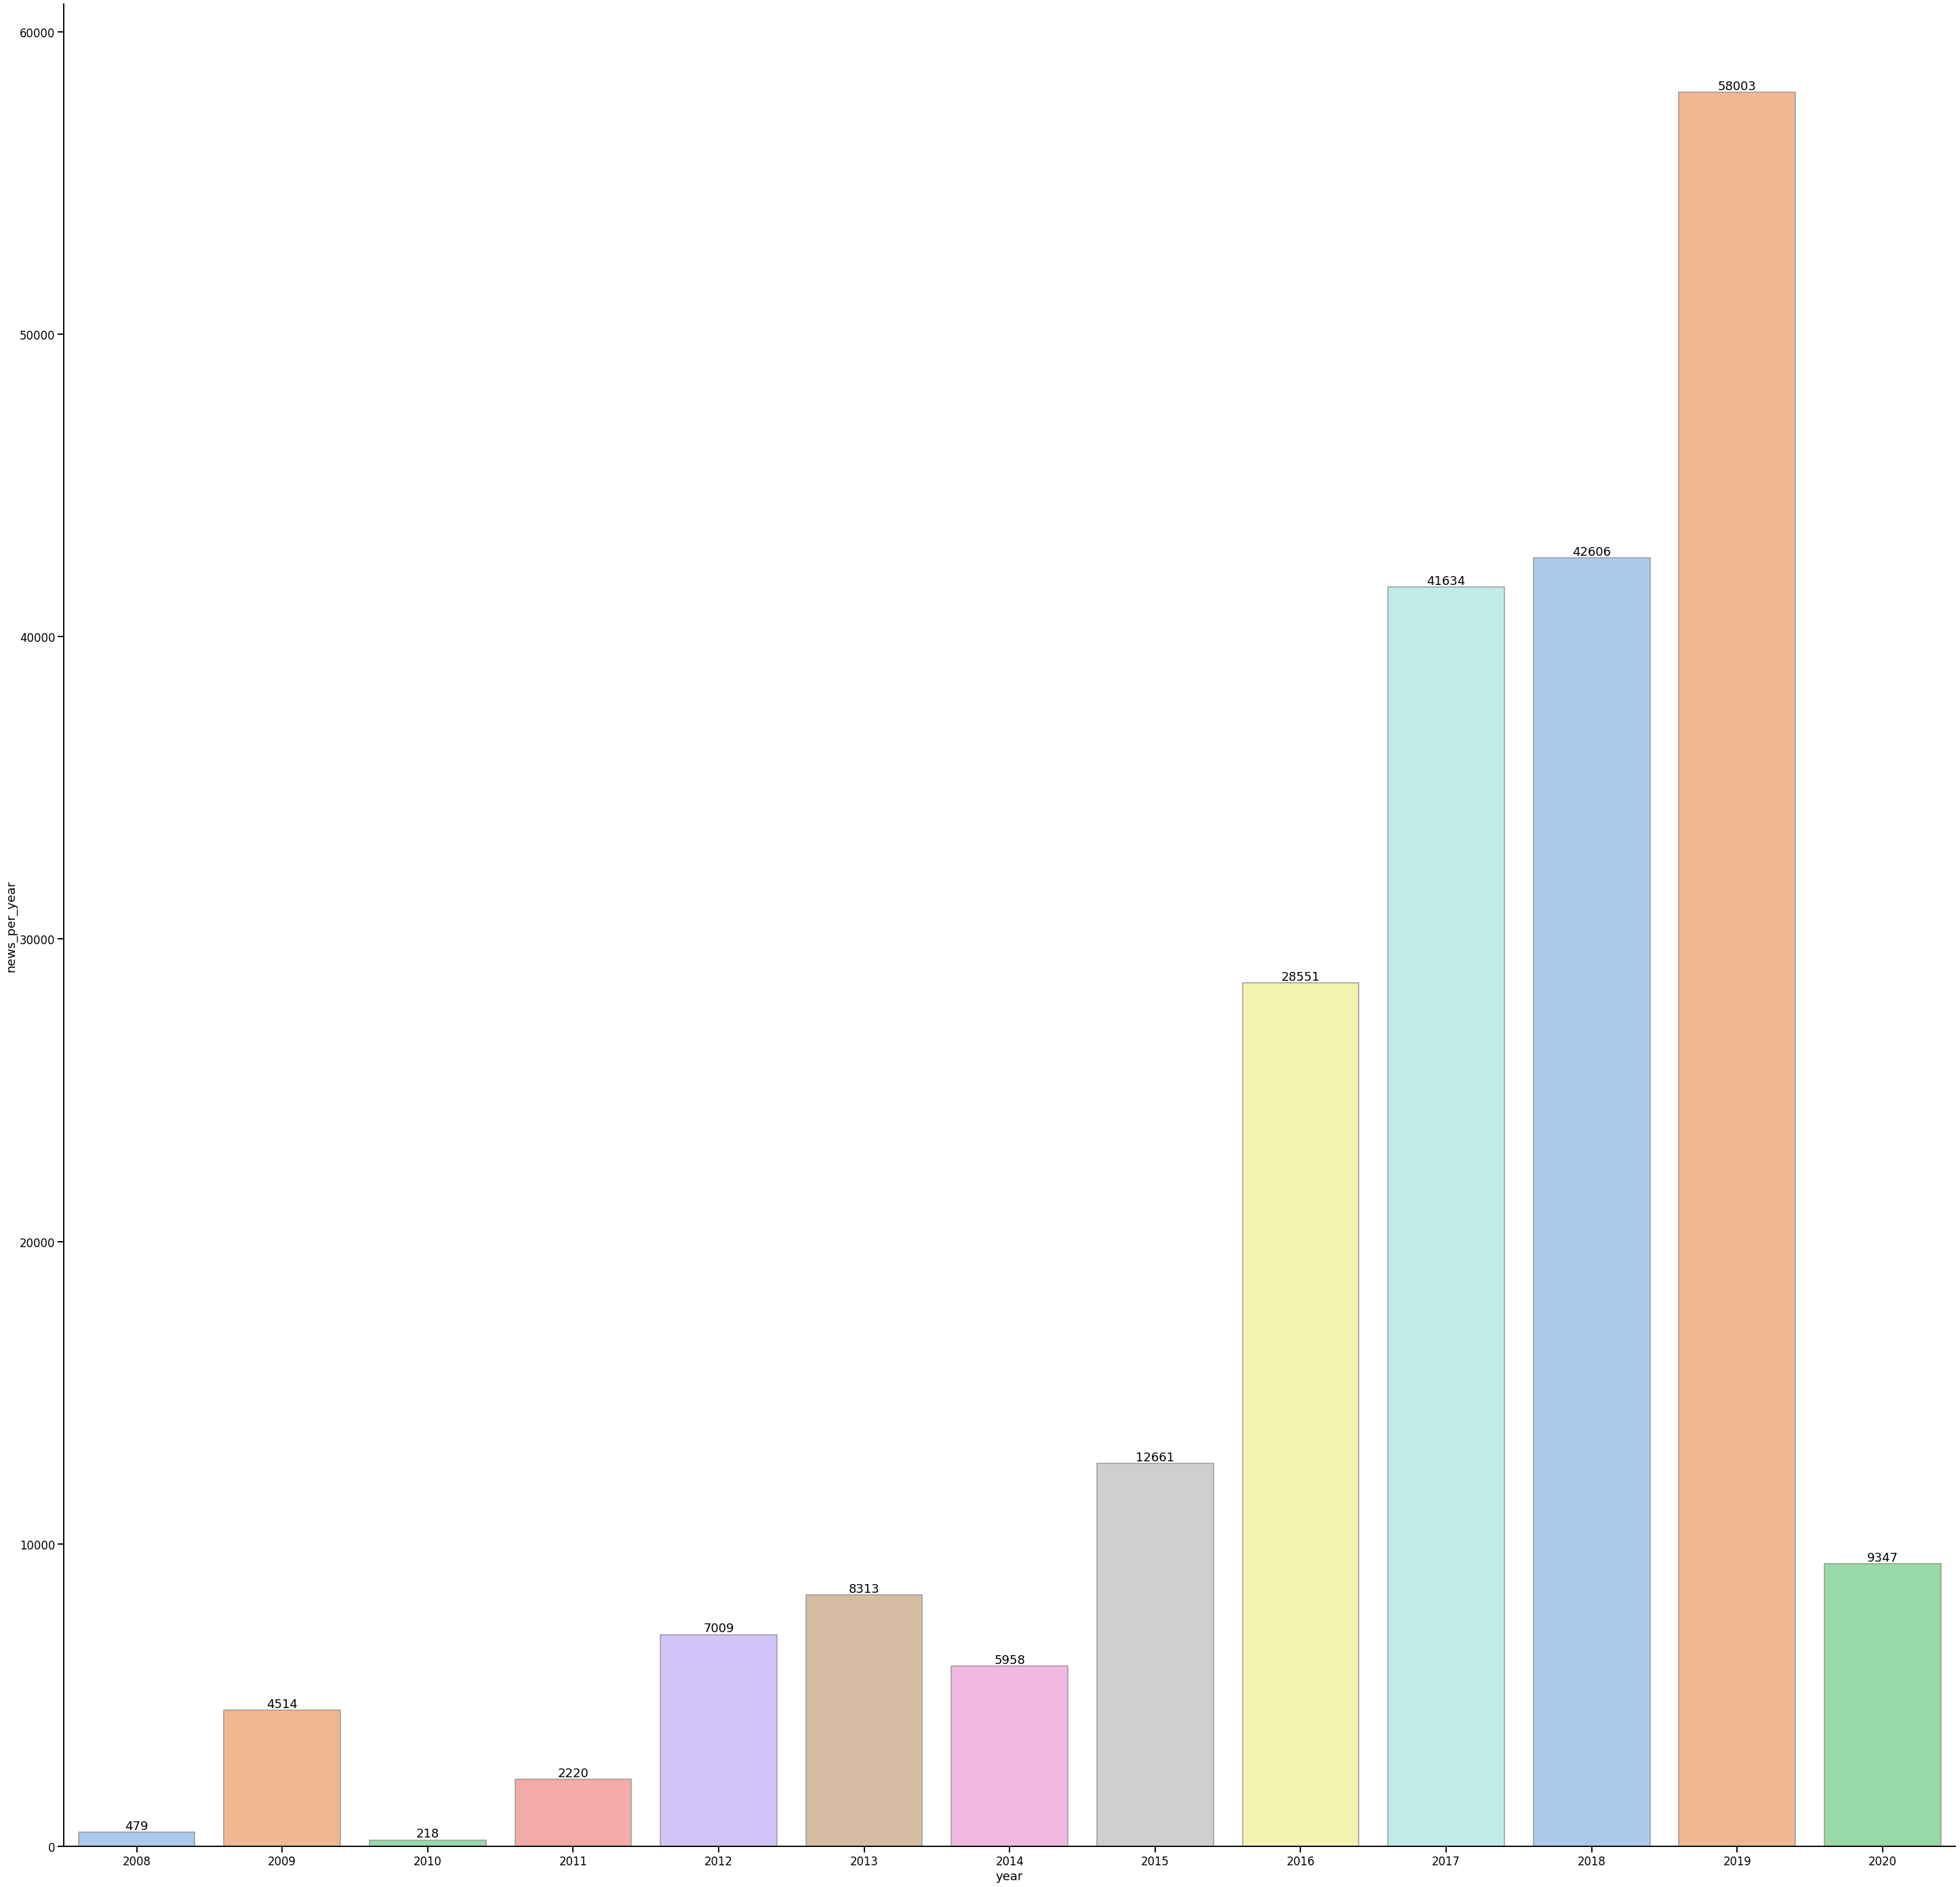

In [19]:
# The number of publications per year is plotted
plt.figure(figsize=(50,50))

plt.xlabel('provider')
plt.ylabel('frequency')

ax = sns.barplot(x="year", y="news_per_year" , palette="pastel", edgecolor=".6", data=news_per_year_count)
ax.bar_label(ax.containers[0])
sns.despine()

# Cantidad de noticias por ticker

In [20]:
news_per_ticker_count = new_df["ticker"].value_counts()\
    .reset_index()\
    .rename(columns={'index': 'ticker', 'ticker': 'news_per_ticker'})


for i, row in enumerate(news_per_ticker_count.itertuples(), 0):
    print(row)

Pandas(Index=0, ticker='AAPL', news_per_ticker=20231)
Pandas(Index=1, ticker='MSFT', news_per_ticker=8110)
Pandas(Index=2, ticker='BAC', news_per_ticker=7409)
Pandas(Index=3, ticker='AMZN', news_per_ticker=6330)
Pandas(Index=4, ticker='NWSA', news_per_ticker=5914)
Pandas(Index=5, ticker='BA', news_per_ticker=5879)
Pandas(Index=6, ticker='GOOGL', news_per_ticker=5171)
Pandas(Index=7, ticker='GS', news_per_ticker=4513)
Pandas(Index=8, ticker='TSLA', news_per_ticker=4283)
Pandas(Index=9, ticker='NFLX', news_per_ticker=3806)
Pandas(Index=10, ticker='TGT', news_per_ticker=3689)
Pandas(Index=11, ticker='INTC', news_per_ticker=3188)
Pandas(Index=12, ticker='DIS', news_per_ticker=2875)
Pandas(Index=13, ticker='XOM', news_per_ticker=2831)
Pandas(Index=14, ticker='JPM', news_per_ticker=2600)
Pandas(Index=15, ticker='MS', news_per_ticker=2498)
Pandas(Index=16, ticker='GM', news_per_ticker=2089)
Pandas(Index=17, ticker='C', news_per_ticker=2082)
Pandas(Index=18, ticker='GE', news_per_ticker=2045)


In [21]:
news_per_ticker_count_filter = news_per_ticker_count[news_per_ticker_count["news_per_ticker"] >= 2500]

In [22]:
news_per_ticker_count_filter

,ticker,news_per_ticker
0,AAPL,20231
1,MSFT,8110
2,BAC,7409
3,AMZN,6330
4,NWSA,5914
5,BA,5879
6,GOOGL,5171
7,GS,4513
8,TSLA,4283
9,NFLX,3806


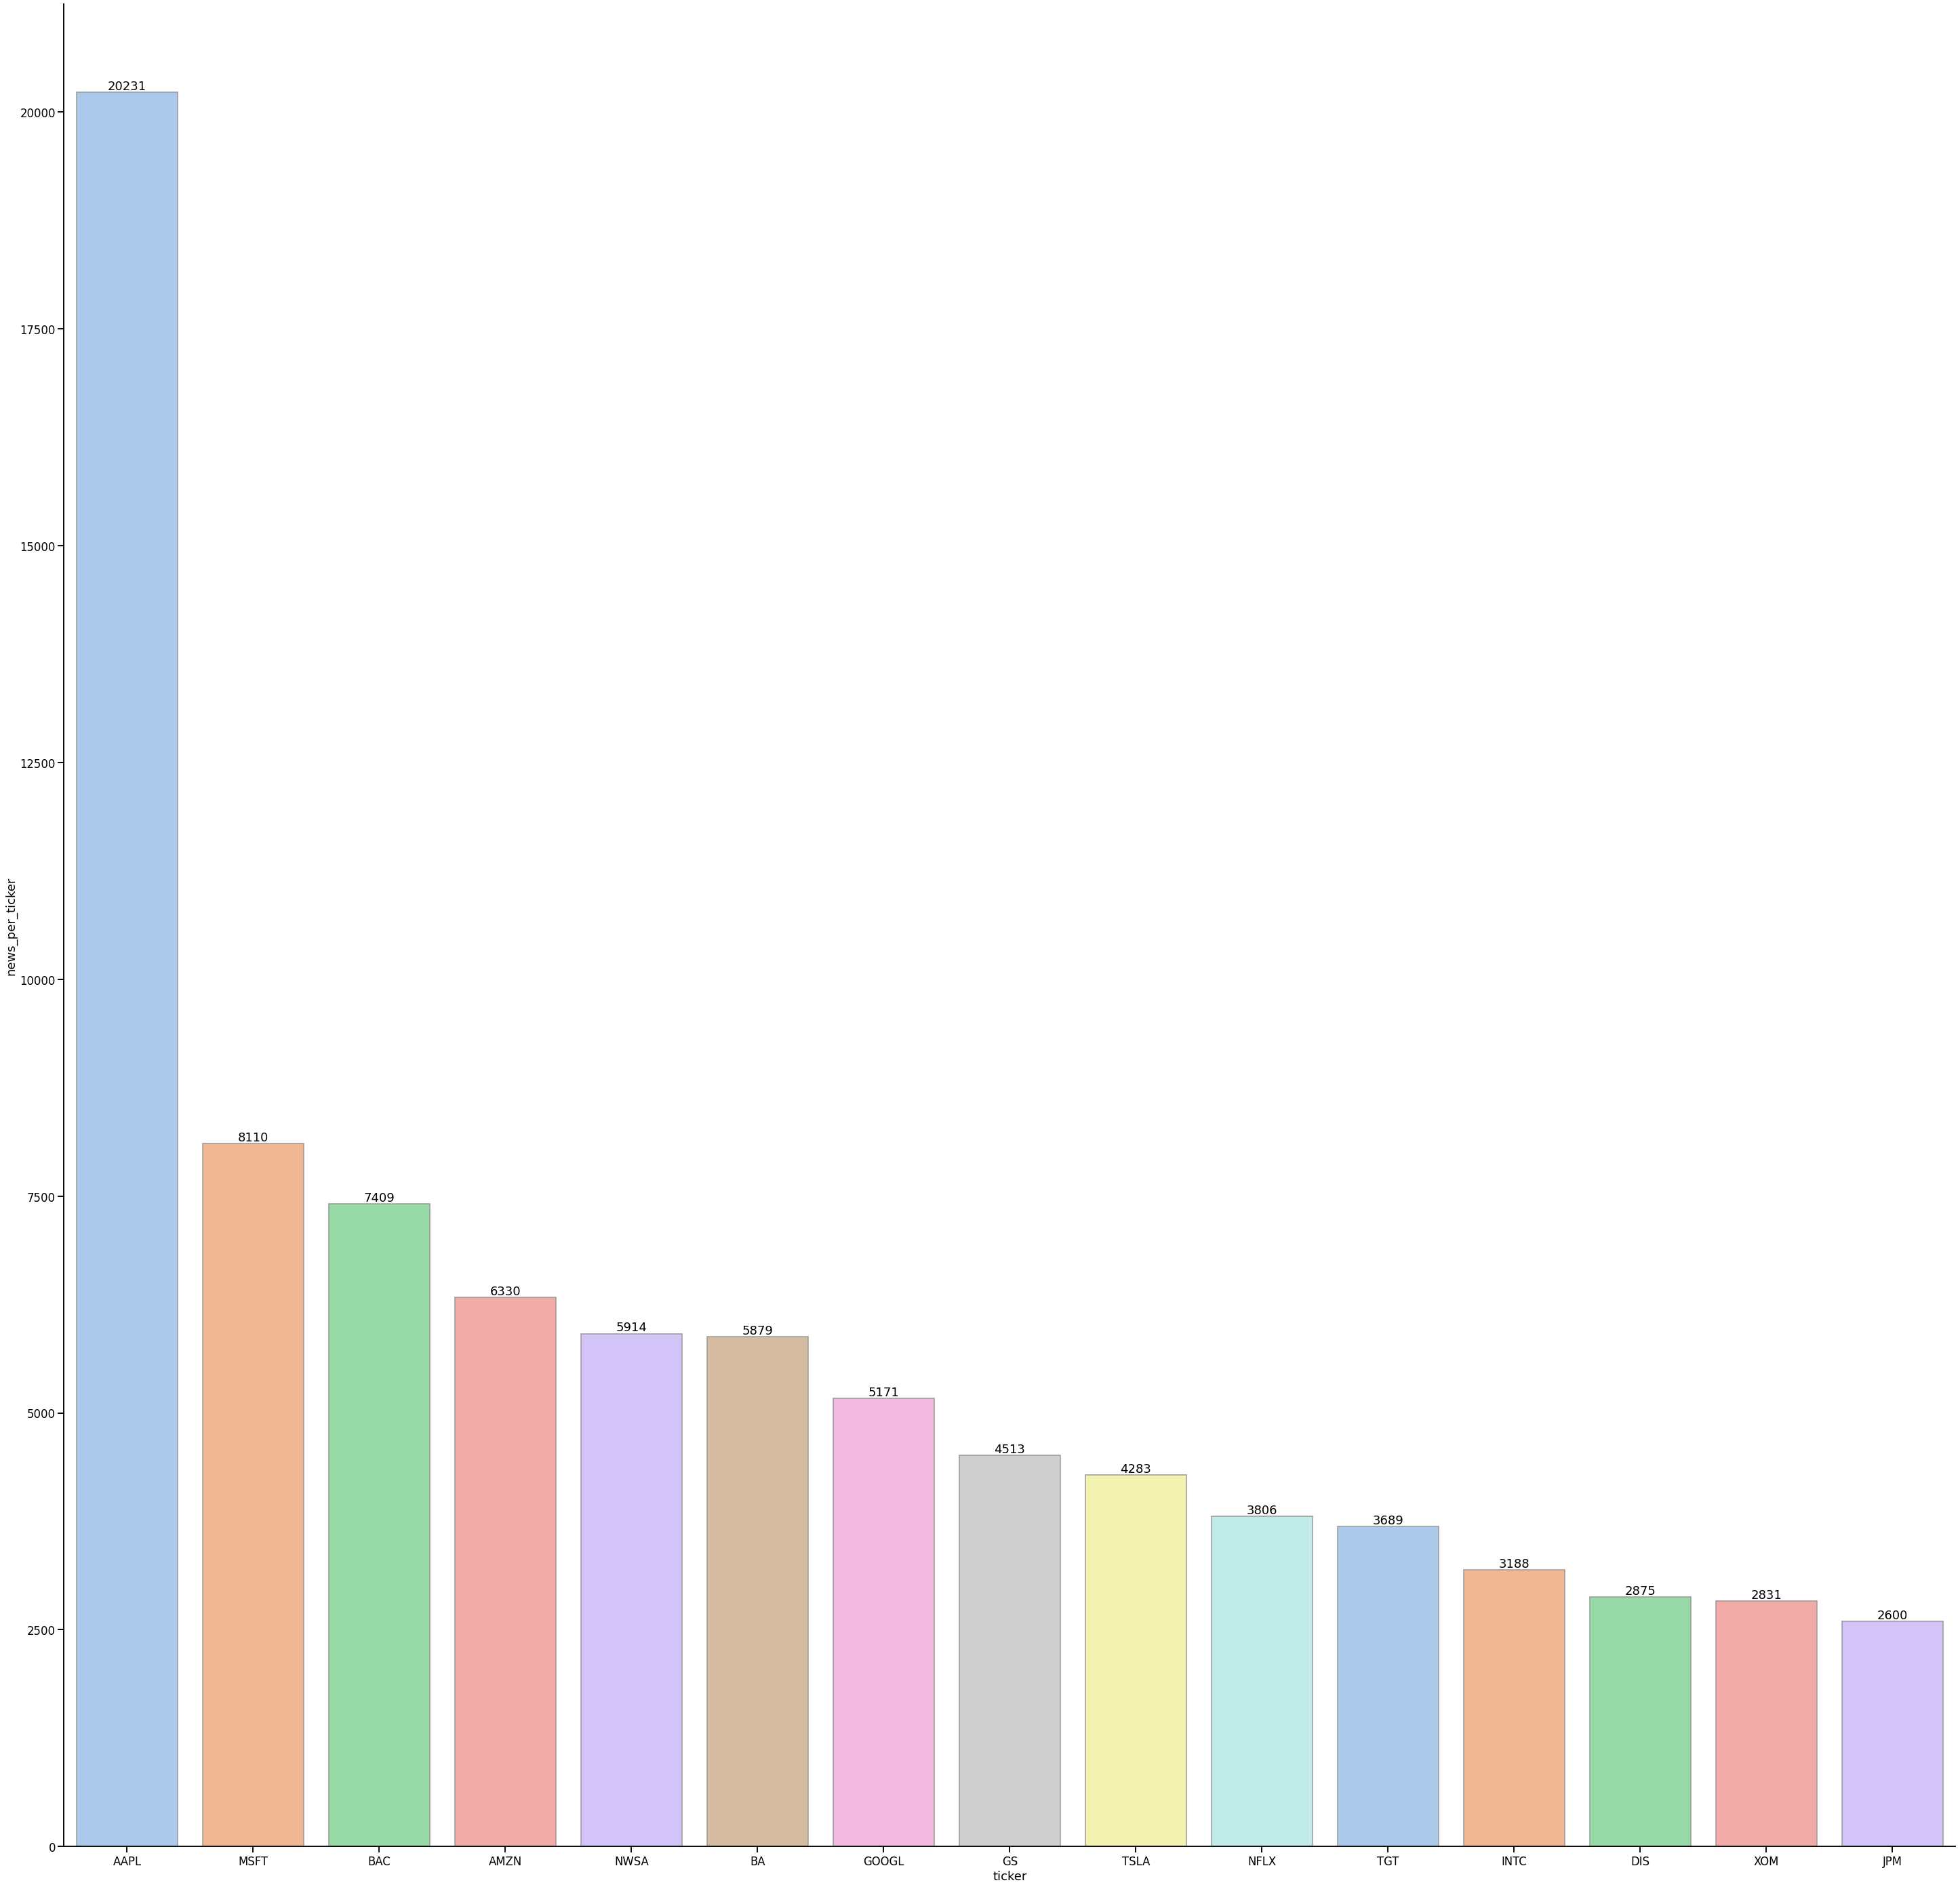

In [23]:
plt.figure(figsize=(50,50))

plt.xlabel('ticker')
plt.ylabel('news_per_ticker')

ax = sns.barplot(x="ticker", y="news_per_ticker", palette="pastel", edgecolor=".6", data=news_per_ticker_count_filter)
ax.bar_label(ax.containers[0])
sns.despine()

# Cantidad de noticias por ticker y por año

In [24]:
group_by_df = new_df.copy()

In [25]:
group_by_df = group_by_df[(df["ticker"]=="AAPL") | (df["ticker"]=="MSFT")].groupby(['ticker','release_date_year']).size().reset_index(name='counts_news')
sort_group_by_df = group_by_df.copy()
sort_group_by_df = sort_group_by_df.sort_values(by=['release_date_year'], ascending=True)
sort_group_by_df = sort_group_by_df.reset_index(drop=True)

In [26]:
sort_group_by_df

,ticker,release_date_year,counts_news
0,MSFT,2008,5
1,MSFT,2009,66
2,MSFT,2010,1
3,MSFT,2011,37
4,MSFT,2012,99
5,AAPL,2012,264
6,AAPL,2013,484
7,MSFT,2013,168
8,AAPL,2014,720
9,MSFT,2014,163


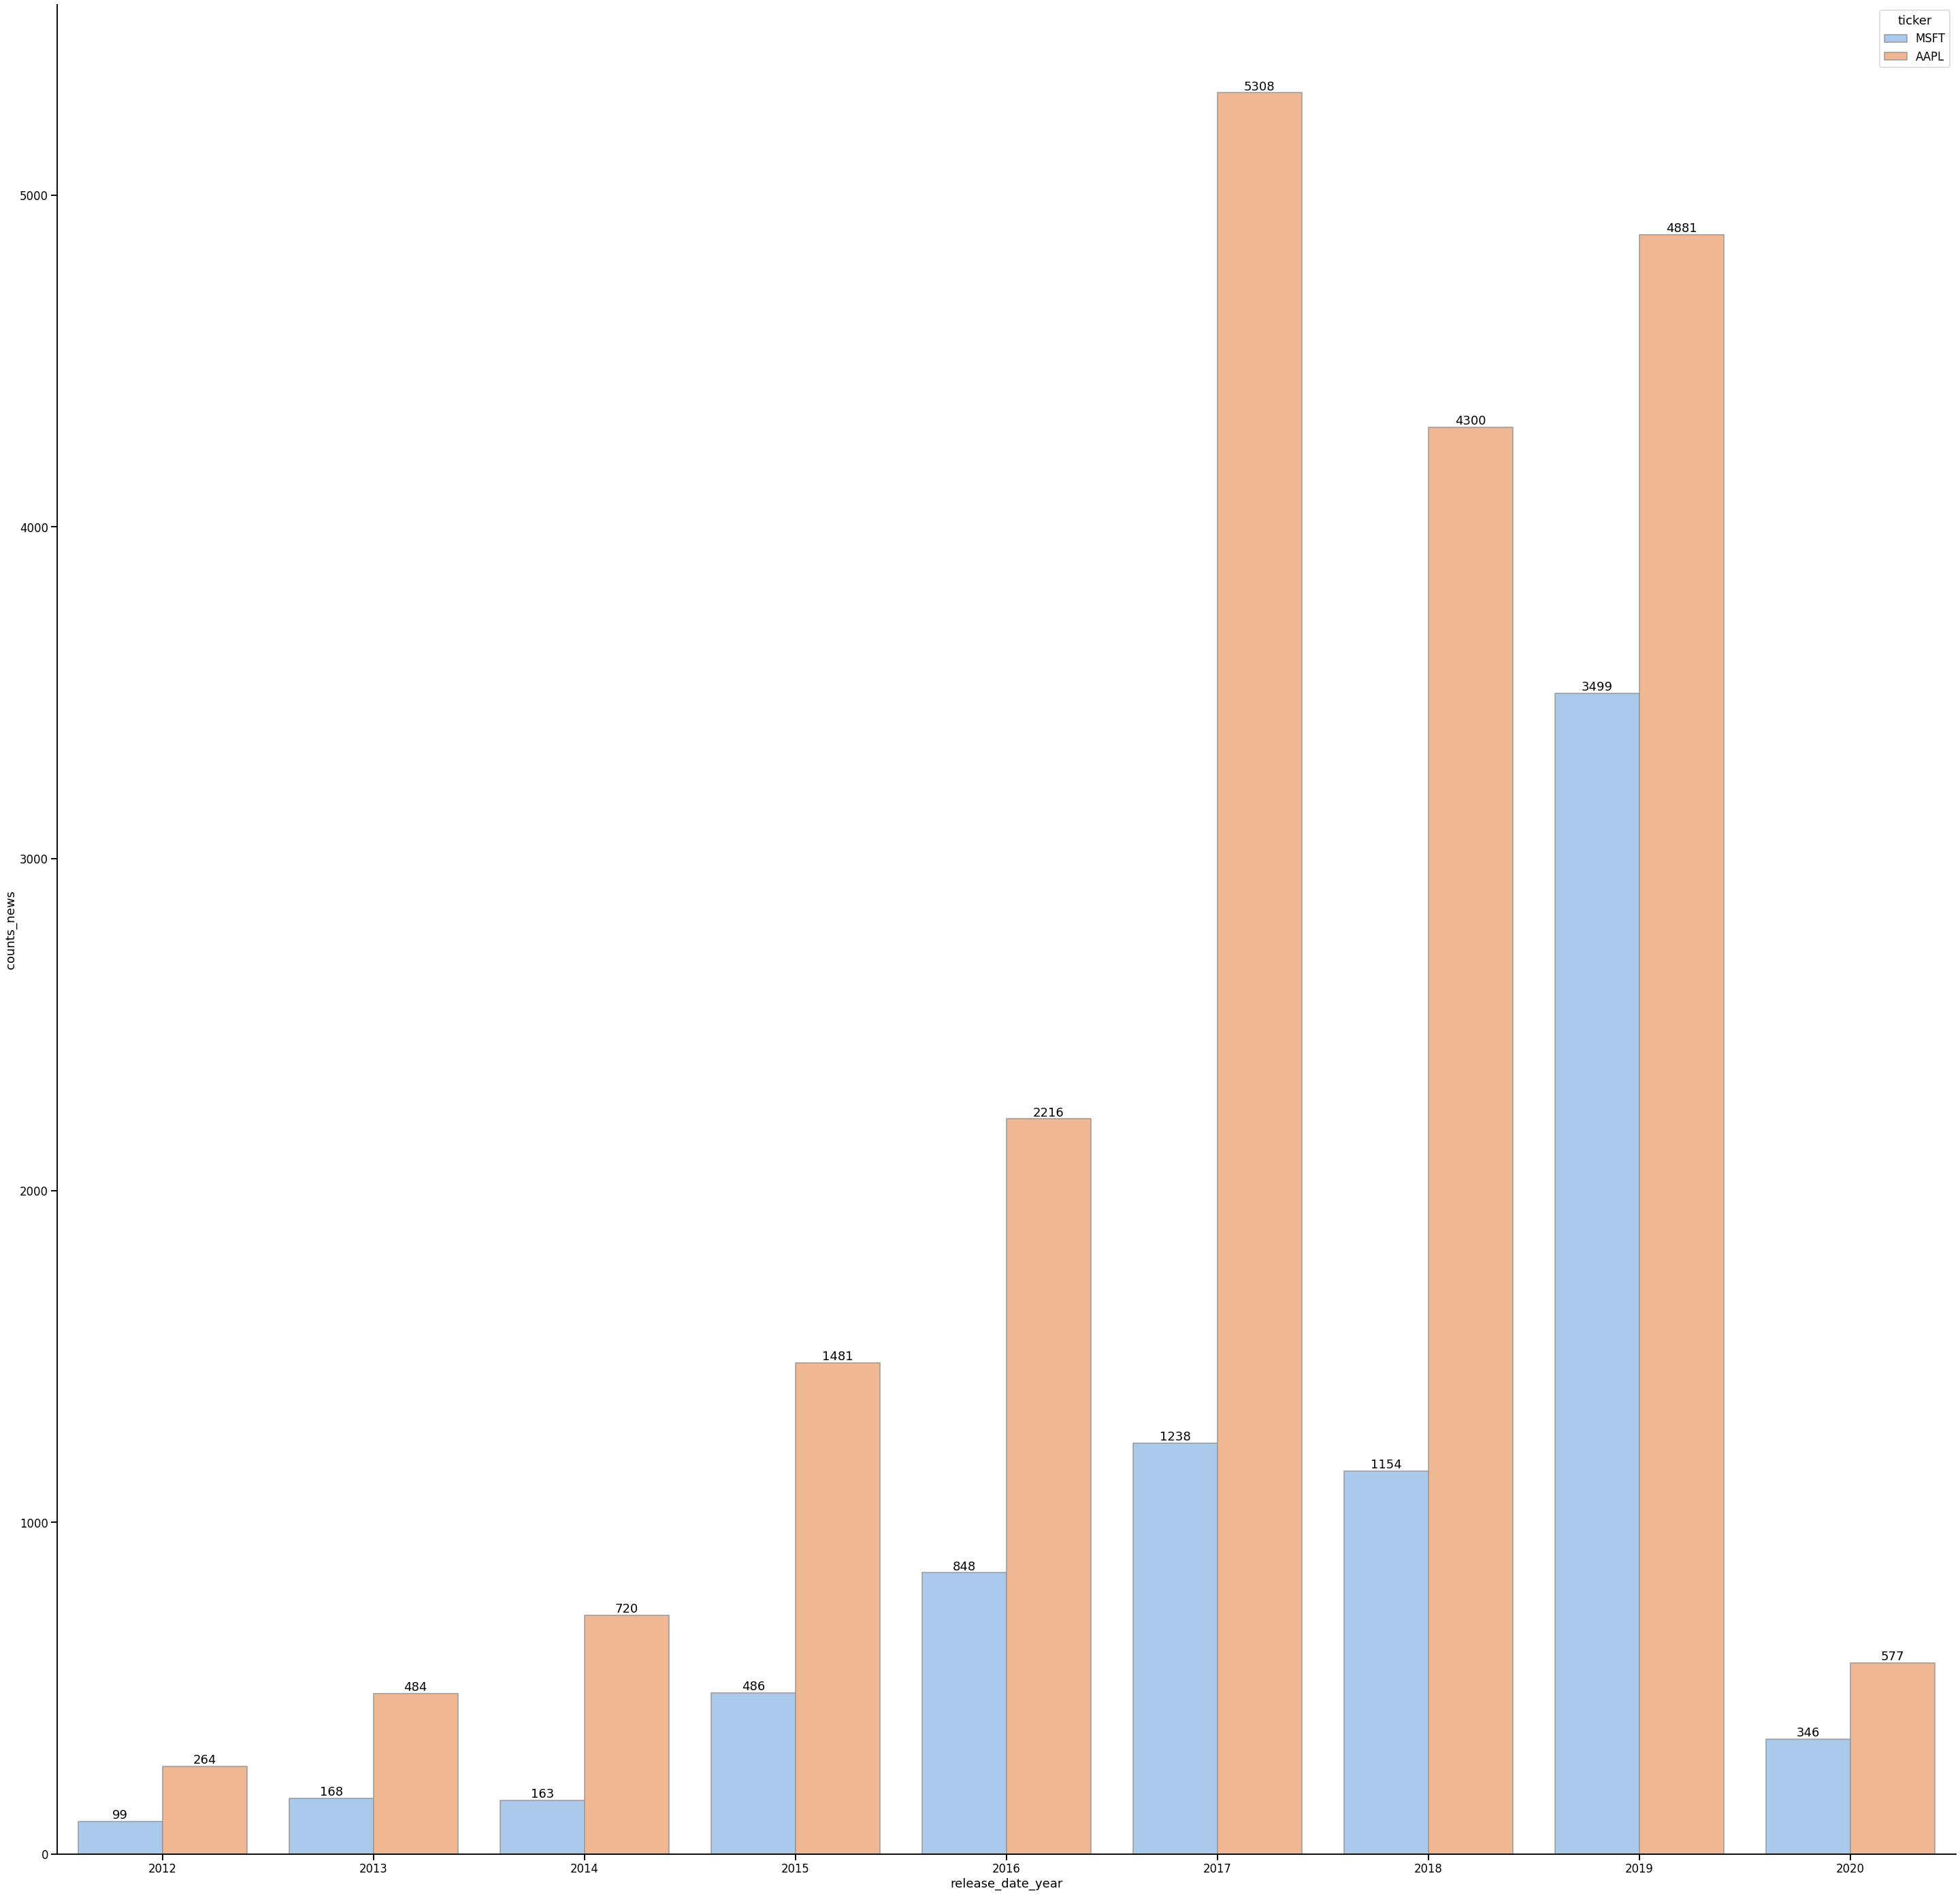

In [27]:
#set seaborn plotting aesthetics
plt.figure(figsize=(50,50))

plt.xlabel('release_date_year')
plt.ylabel('counts_news')

#create grouped bar chart
ax = sns.barplot(x='release_date_year', y='counts_news', hue='ticker', palette="pastel", edgecolor=".6", data=sort_group_by_df[sort_group_by_df.release_date_year > 2011], errwidth=0)

# ax.bar_label(ax.containers[0])

for i in ax.containers:

  ax.bar_label(i,)
    
sns.despine()

# Create datasets 

# Frecuencia de las palabras

In [28]:
# Importo las librerías necesarias para procesar los textos
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import re

SPECIAL_CHARACTERS = []

SPECIAL_CHARACTERS.extend(map(chr, range(0, 32)))
SPECIAL_CHARACTERS.extend(map(chr, range(33, 48)))
SPECIAL_CHARACTERS.extend(map(chr, range(58, 65)))
SPECIAL_CHARACTERS.extend(map(chr, range(91, 97)))
SPECIAL_CHARACTERS.extend(map(chr, range(123, 225)))
SPECIAL_CHARACTERS.extend(map(chr, range(226, 233)))
SPECIAL_CHARACTERS.extend(map(chr, range(234, 237)))
SPECIAL_CHARACTERS.extend(map(chr, range(238, 241)))
SPECIAL_CHARACTERS.extend(map(chr, range(242, 243)))
SPECIAL_CHARACTERS.extend(map(chr, range(244, 250)))
SPECIAL_CHARACTERS.extend(map(chr, range(251, 880)))

In [29]:
class CleanText():
    
    def __init__(self, text, language="english"):
        
        self.text = text
        
        self.language = language
        
        self.clean_text = None
        
        self.remove_spec_text = None
        
        self.remove_stop_text = None
        
        self.lemma_text = None
    
    def removePatterns(self):
        
        replacements = (
            ("á", "a"),
            ("é", "e"),
            ("í", "i"),
            ("ó", "o"),
            ("ú", "u"),
        )
        
        self.text = str(self.text)
        
        self.clean_text = self.text.lower()
        
        self.clean_text = re.sub(r"\s{2,}", " ", self.clean_text)
        
        self.clean_text = re.sub(r"\n", " ", self.clean_text)
        
        self.clean_text = re.sub(r"\d+", " ", self.clean_text)
        
        self.clean_text = re.sub(r"^\s+", " ", self.clean_text)
        
        self.clean_text = re.sub(r"\s+", " ", self.clean_text)
        
        for a, b in replacements:
            
            self.clean_text = self.clean_text.replace(a, b).replace(a.upper(), b.upper())
        
        return self.clean_text
    
    def removeSpecChars(self):
        
        remove_patterns = self.removePatterns()
        
        tokens = list(word_tokenize(remove_patterns))
        
        clean_tokens = tokens.copy()
        
        for i in range(len(clean_tokens)):
            
            for special_character in SPECIAL_CHARACTERS:
            
                clean_tokens[i] = clean_tokens[i].replace(special_character, '')            
            
        clean_tokens = [token for token in clean_tokens if token]        
        
        self.remove_spec_text = " ".join(clean_tokens)        
        
        return self.remove_spec_text       
    
    def RemoveStopText(self):
        
        st = ["'", "!", '"', "#", "$", "%", "&", "*", "+", "-", ".", "/", "<", "=", '>', "?",
          "@", "[", "\\", "]", "^", "_", '`', "{", "|", "}", '~']
        
        sw = stopwords.words(self.language) + st
        
        text = list(word_tokenize(self.removeSpecChars()))
        
        text = [w for w in text if not w in sw]
        
        self.remove_stop_text = " ".join(text)
        
        return self.remove_stop_text
    
    def lemmatizeText(self):
        
        lemmatizer = WordNetLemmatizer()
        
        list_lemma_text = []
        
        tokens = word_tokenize(self.RemoveStopText())
        
        for token in tokens:
            
            lemmetized_word = lemmatizer.lemmatize(token)
            
            list_lemma_text.append(lemmetized_word)
        
        self.lemma_text = " ".join(list_lemma_text)
        
        return self.lemma_text

In [31]:
# new_df["clean_content"] = new_df["content"].map(lambda x: CleanText(str(x)).lemmatizeText())

# new_df["clean_title"] = new_df["title"].map(lambda x: CleanText(str(x)).lemmatizeText())

In [30]:
# load dataset
new_df = pd.read_csv(os.path.join(root_path, "datasets", "clean_news_dataset_v2.csv"))

In [32]:
new_df.head(5)

,id,ticker,title,category,content,release_date,provider,url,article_id,release_date_year,clean_content,clean_title
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327,2020,happening share chinese electric car maker nio...,share chinese electric car maker nio flying hi...
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196,2020,gainer nio nyse nio loser mgp ingredient nasda...,nio consumer gainer workhorse group among loser
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249,2020,gainer nio nyse nio village farm international...,nio lead consumer gainer beyond meat mattel am...
3,221518,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039,2020,cemtrex nasdaq cetx fy result fluent nasdaq fl...,nio nvax among premarket gainer
4,221519,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096,2020,atyr pharma nasdaq life kyorin pharma deal tow...,plug nio among premarket gainer


# Palabras más frecuentes

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
df_test = new_df.copy()
df_test = df_test.sample(frac=0.15, random_state=200)
df_test = df_test.reset_index(drop=True)

In [35]:
df_test.shape

(33227, 12)

In [36]:
cv = CountVectorizer()
sum_words_with_clean = cv.fit_transform(df_test['clean_content'].values.astype('U')).sum(axis=0)

# Calculamos 
words_freq_with_clean = [(word, sum_words_with_clean[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_with_clean = sorted(words_freq_with_clean, key = lambda x: x[1], reverse=True)[:20]

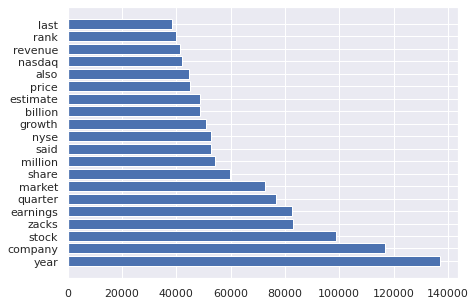

In [37]:
sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_freq_with_clean))

plt.show()

# Merge "title" with "content" and "clean_title" with "clean_content"

In [38]:
sum_words_with_clean_title = cv.fit_transform((df_test["clean_title"] + df_test["clean_content"]).values.astype('U')).sum(axis=0)

# Calculamos 
words_freq_with_clean_title = [(word, sum_words_with_clean_title[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_with_clean_title = sorted(words_freq_with_clean_title, key = lambda x: x[1], reverse=True)[:20]

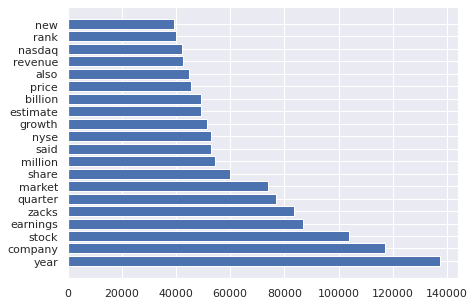

In [39]:
sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_freq_with_clean_title))

plt.show()

# Clean Title

In [40]:
cv = CountVectorizer()
sum_words_only_title = cv.fit_transform(df_test['clean_title'].values.astype('U')).sum(axis=0)

# Calculamos 
words_freq_only_title = [(word, sum_words_only_title[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_only_title = sorted(words_freq_only_title, key = lambda x: x[1], reverse=True)[:20]

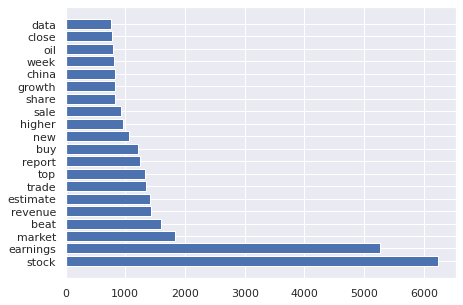

In [41]:
sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_freq_only_title))

plt.show()

# El fin de este dataset es predecir si el label es opinion o news

In [42]:
df_test.category.value_counts()

opinion    18943
news       14284
Name: category, dtype: int64

In [43]:
df_category = new_df.copy()
df_category = df_category.sample(frac=0.2, random_state=200)
df_category = df_category.reset_index(drop=True)

df_opinion = df_category[df_category.category == "opinion"]
df_news = df_category[df_category.category == "news"]

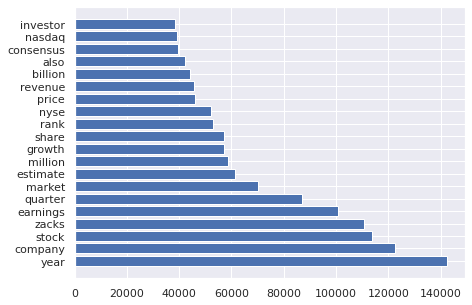

In [44]:
# Se ve cuales son las palabras mas frecuentes en la category == opinion
sum_words_opinion = cv.fit_transform(df_opinion['clean_content'].values.astype('U')).sum(axis=0)

# Calculamos 
words_freq_opinion = [(word, sum_words_opinion[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_opinion = sorted(words_freq_opinion, key = lambda x: x[1], reverse=True)[:20]

sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_freq_opinion))

plt.show()

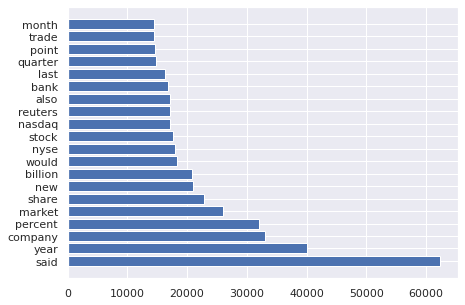

In [45]:
# Se ve cuales son las palabras mas frecuentes en la category == news
sum_words_news = cv.fit_transform(df_news['clean_content'].values.astype('U')).sum(axis=0)

# Calculamos 
words_freq_news = [(word, sum_words_news[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_news = sorted(words_freq_news, key = lambda x: x[1], reverse=True)[:20]

sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_freq_news))

plt.show()

# Se investiga cuales son las palabras unicas de la categoría de opinion y de news

In [46]:
list_word_opinion = [x[0] for x in words_freq_opinion]
list_word_news = [y[0] for y in words_freq_news]

In [47]:
unique_word_opinion = [x for x in list_word_opinion if x not in list_word_news]
unique_word_news = [x for x in list_word_news if x not in list_word_opinion]

In [48]:
print(unique_word_opinion)
print(unique_word_news)

['zacks', 'earnings', 'estimate', 'million', 'growth', 'rank', 'price', 'revenue', 'consensus', 'investor']
['said', 'percent', 'new', 'would', 'reuters', 'bank', 'last', 'point', 'trade', 'month']


# Se observan los bigrams y trigrams más frecuentes

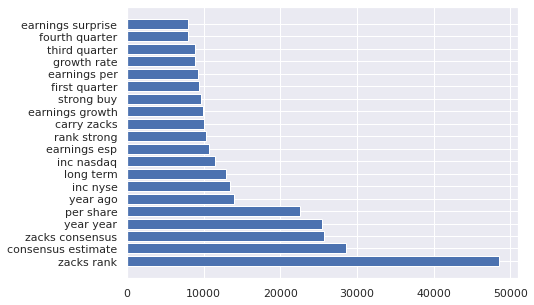

In [49]:
cv_bigram = CountVectorizer(ngram_range=(2, 2))

# Se ve cuales son las palabras mas frecuentes en la category == opinion
sum_bigram_opinion = cv_bigram.fit_transform(df_opinion['clean_content'].values.astype('U')).sum(axis=0)

# Calculamos 
words_bigram_opinion = [(word, sum_bigram_opinion[0, idx]) for word, idx in cv_bigram.vocabulary_.items()]
words_bigram_opinion = sorted(words_bigram_opinion, key = lambda x: x[1], reverse=True)[:20]

sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_bigram_opinion))

plt.show()

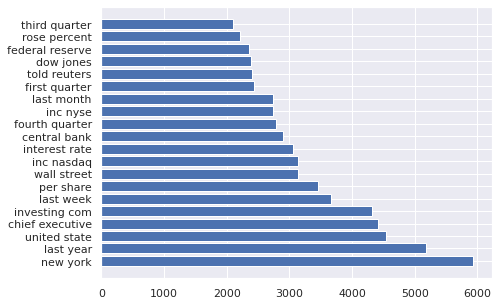

In [50]:
# Se ve cuales son las palabras mas frecuentes en la category == opinion
sum_bigram_news = cv_bigram.fit_transform(df_news['clean_content'].values.astype('U')).sum(axis=0)

# Calculamos 
words_bigram_news = [(word, sum_bigram_news[0, idx]) for word, idx in cv_bigram.vocabulary_.items()]
words_bigram_news = sorted(words_bigram_news, key = lambda x: x[1], reverse=True)[:20]

sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_bigram_news))

plt.show()

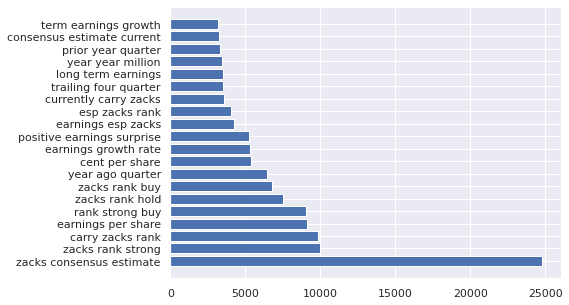

In [51]:
cv_trigram = CountVectorizer(ngram_range=(3, 3))

# Se ve cuales son las palabras mas frecuentes en la category == opinion
sum_trigram_opinion = cv_trigram.fit_transform(df_opinion['clean_content'].values.astype('U')).sum(axis=0)

# Calculamos 
words_trigram_opinion = [(word, sum_trigram_opinion[0, idx]) for word, idx in cv_trigram.vocabulary_.items()]
words_trigram_opinion = sorted(words_trigram_opinion, key = lambda x: x[1], reverse=True)[:20]

sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_trigram_opinion))

plt.show()

In [ ]:
# Se ve cuales son las palabras mas frecuentes en la category == opinion
# sum_trigram_news = cv_trigram.fit_transform(df_news['clean_content'].values.astype('U')).sum(axis=0)

# Calculamos 
# words_trigram_news = [(word, sum_trigram_news[0, idx]) for word, idx in cv_trigram.vocabulary_.items()]
# words_trigram_news = sorted(words_trigram_news, key = lambda x: x[1], reverse=True)[:20]

# sns.set(font_scale=1)

# plt.figure(figsize=(7, 5))
# plt.barh(*zip(*words_trigram_news))

# plt.show()

In [52]:
list_bigram_opinion = [x[0] for x in words_bigram_opinion]
list_bigram_news = [y[0] for y in words_bigram_news]

In [53]:
unique_bigram_opinion = [x for x in list_bigram_opinion if x not in list_bigram_news]
unique_bigram_news = [x for x in list_bigram_news if x not in list_bigram_opinion]

In [54]:
print(unique_bigram_opinion)
print(unique_bigram_news)

['zacks rank', 'consensus estimate', 'zacks consensus', 'year year', 'year ago', 'long term', 'earnings esp', 'rank strong', 'carry zacks', 'earnings growth', 'strong buy', 'earnings per', 'growth rate', 'earnings surprise']
['new york', 'last year', 'united state', 'chief executive', 'investing com', 'last week', 'wall street', 'interest rate', 'central bank', 'last month', 'told reuters', 'dow jones', 'federal reserve', 'rose percent']


# Conclusión

En este estudio preliminar se observa 